In [1]:
#Required Libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
#Read dataset
data = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes2.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
#Grab features and label from dataframe
x = data[['Glucose', 'Age']].values
# x = data[['Glucose', 'Age', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']].values
y = data['Outcome'].values

print(x.shape)
print(y.shape)

(768, 2)
(768,)


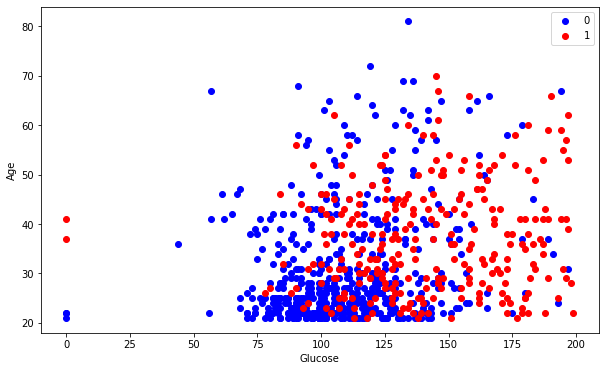

In [7]:
#Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='b', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='1')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.legend()

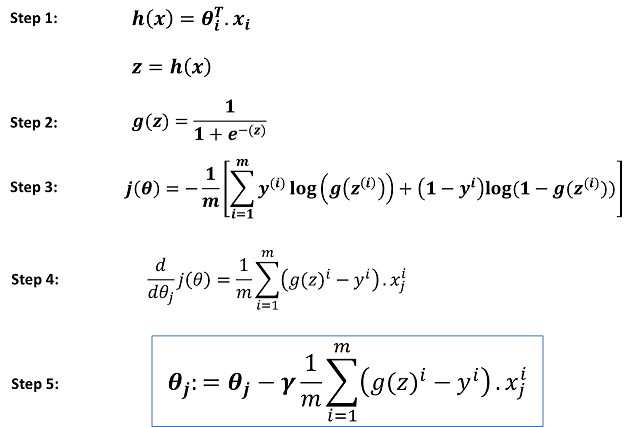

In [8]:
class LogisticRegression:
    
    def __init__(self, l_rate=0.001, iterations=1000):  #assign values for hyper-parameters
        self.l_rate = l_rate  #learning rate
        self.iterations = iterations  #number of iterations

    def fit(self, x, y):  #Fit the training data using Gradient Descent
        self.losses = []  # An empty list to store the error in each iteration
        self.theta = np.zeros((1 + x.shape[1]))  #intitalization,,,Array of zeros 
        n = x.shape[0]  #number of training examples 768
        
        for i in range(self.iterations):
            #Step1
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])  # hypothesis h(x)
            z = y_pred
            #Step2
            g_z =  1 / (1 + np.e**(-z))  #map predicted values to probabilities between 0 & 1      
            
            #Step3
            cost = (-y * np.log(g_z) - (1 - y) * np.log(1 - g_z))/ n #cost function
            self.losses.append(cost) #Tracking losses
            
            #Step4
            d_theta1 = (1/n) * np.dot(x.T, (g_z - y)) #Derivatives of theta[1:]
            d_theta0 = (1/n) * np.sum(g_z - y)  #Derivatives of theta[0]
            
            #Step5
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1  #upadting values of thetas using Gradient descent
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0  #upadting the value of theta 0 using Gradient descent     
        return self
    
    
    def predict(self, x):  #Predicts the value after the model has been trained.
        y_pred = self.theta[0] + np.dot(x, self.theta[1:]) 
        z = y_pred
        g_z = 1 / (1 + np.e**(-z))
        return [1 if i > 0.5 else 0 for i in g_z] #Threshold  
   

In [9]:
#features scaling using z-score
def scale(x):
    x_scaled = x - np.mean(x, axis=0)
    x_scaled = x_scaled / np.std(x_scaled, axis=0)
    return x_scaled

In [10]:
x_sd= scale(x)  #call the function scale()
model = LogisticRegression()
model.fit(x_sd, y)

In [11]:
# print theta 0, 1, 2
print("theta_0= ", model.theta[0])
print("theta_1= ", model.theta[1])
print("theta_2= ", model.theta[2])

theta_0=  -0.13376189035272026
theta_1=  0.19399530029457032
theta_2=  0.09450785466873635


In [12]:
y_pred = model.predict(x_sd)

In [13]:
#compute confusion matrix
CM = confusion_matrix(y_pred, y, labels=[1,0])
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[140  69]
 [128 431]]


In [14]:
TP=CM[0][0]
FP=CM[0][1]
FN=CM[1][0]
TN=CM[1][1]

In [15]:
ACC = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy is : \n', ACC)
print('--------------------------------')
Rec = TP/(TP+FN)
print('Recall is : \n', Rec)
print('--------------------------------')
Prec = TP/(TP+FP)
print('Precsion is : \n', Prec)
print('--------------------------------')
F1 = 2 * ((Prec * Rec)/(Prec + Rec))
print('F1 score is : \n', F1)
print('--------------------------------')

Accuracy is : 
 0.7434895833333334
--------------------------------
Recall is : 
 0.5223880597014925
--------------------------------
Precsion is : 
 0.6698564593301436
--------------------------------
F1 score is : 
 0.5870020964360587
--------------------------------


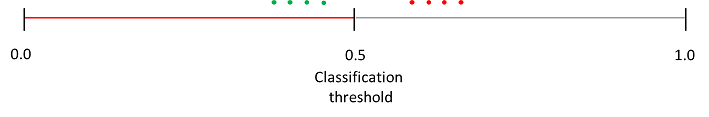